In [1]:
from __future__ import division

import numpy as np
import random

from matplotlib import rc
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/ekaterinakuzina/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rc', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Bootstrap Example 1.

Рассмотрим такую смесь двух известных распределений: две трети данных идут от экспоненциального распределения с параметром $\lambda = 1$, а оставшая треть --- стандартного нормального. 

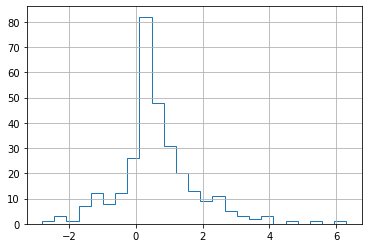

In [2]:
x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');

grid()

In [3]:
n = len(x)
B = 10000
xb = np.random.choice(x, (n, B))
mb = xb.mean(axis=0)
mb.sort()

In [4]:
np.percentile(mb, [2.5, 97.5])

array([0.51640863, 0.78350666])

In [5]:
mean(x)

0.650763445441311

## Bootstrap Example 2.

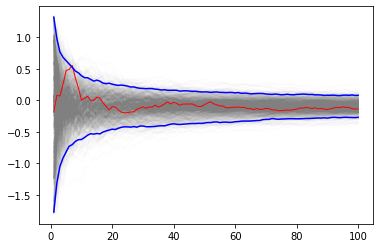

In [6]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

# data sample for integration
n = 100
x = f(np.random.random(n))

# bootstrap MC integration
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

## Exercise 1

### Data

In [7]:
random.seed(43)

In [8]:
N, theta = 50, 1
data = np.random.uniform(0, theta, N)
theta_hat = np.max(data)
theta_hat

0.9935724923941035

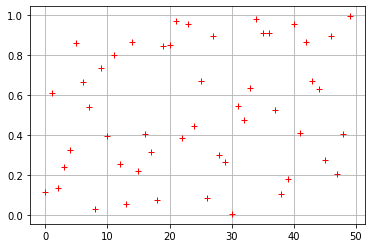

In [9]:
plt.plot(data, 'r+')
#plt.title("Какие-то непонятные точки")

plt.grid()

### Maximum Likelihood Estimation

Итак, у нас есть выборка от равномерного распределения $\mathcal{U}[0, \theta]$. Довольно просто показывается, что 
$$
\hat{\theta}_{\text{MLE}} = \hat{\theta} = \max\{X_1, \dots, X_n \},
$$
для заданной выборки $\mathcal{X} = \{ X_1, \dots, X_n \}$.

Что мы можем сказать про $\hat{\theta}$, точнее про распределние?

$$
F_{\hat{\theta}}(x) = \mathbb{P}(\hat{\theta} \le x) = \mathbb{P} (\max\{X_1, \dots, X_n \} \le x) \stackrel{\text{i.i.d.}}{=} \prod_{i=1}^N \mathbb{P} (X_i \le x) = \left(\frac{x}{\theta}\right)^N. 
$$

Из функции распределения можно легко получить плотность распределения случайной величины $\hat{\theta}$:
$$
f_{\hat{\theta}}(x) = \frac{Nx ^{N-1}}{\theta^N}, \quad \forall x \in (0, \theta).
$$

Теперь давайте сравним эту плотность с гистограммой полученной с помощью бутстрепа. 

### Bootstrapping

In [10]:
B = 100 # B = 1000  # does not change much

In [11]:
theta_b = np.zeros(B)
for i in range(B):
    bootstrap_data = np.random.choice(data, size = N, replace=True)
    theta_b [i] = np.max(bootstrap_data)
theta_b_hat = theta_b.mean()

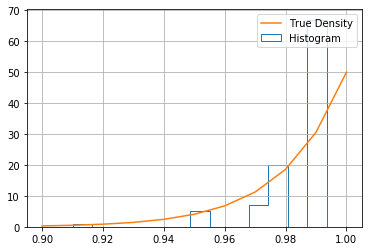

In [12]:
plt.hist(theta_b, bins = 'auto', label = "Histogram", histtype='step')
x = np.arange(0.9, 1.01, 0.01)
plt.plot(x , N * x ** (N - 1), label = "True Density")

plt.legend(loc='best')

plt.grid()

In [13]:
print "Bootstrap theta: ", theta_b_hat, "\n", "MLE theta: ", theta_hat, "\nTrue theta: ", theta

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Bootstrap theta: ", theta_b_hat, "\n", "MLE theta: ", theta_hat, "\nTrue theta: ", theta)? (<ipython-input-13-d64518ec65b9>, line 1)

Кажется, что вроде все нормально и бутстреп дает вполне неплохой результат. 

### Asymptotics 

Заметим, что распределение $\hat{\theta}$ является непрерывным и следовательно $\mathbb{P}(\hat{\theta} = \theta) = 0$ для любого значения $\theta$, тогда как для оценки бутстрепа мы имеем:

$$
\mathbb{P}(\hat{\theta}^{\flat} = \hat{\theta}) = 1 - \mathbb{P}(\hat{\theta}^{\flat} \neq \hat{\theta}) = 1 - \left(\frac{N-1}{N}\right)^N \to 1 - e^{-1} \approx 0.63212
$$

Заметим, что мы берем размер бутстреповской выборки равной тоже $N$. Что будет, если взять выборку поменьше? Предположим мы берем выборку с мощностью $N/k$, тогда 
$$
\mathbb{P}(\hat{\theta}^{\flat} = \hat{\theta}) = 1 - \mathbb{P}(\hat{\theta}^{\flat} \neq \hat{\theta}) = 1 - \left(\frac{N-1}{N}\right)^{N/k} \to 1 - e^{-k}
$$

Для $k = 3$ эта вероятность уже 0.95.

In [ ]:
1 - np.exp(-3)

## Exercise 2. 

Для заданной выборки $\xi_1, \dots, \xi_n$ из распределения $\mathcal{N}(a, \sigma^2)$ построить доверительный интервал для третьего момента $\mathbb{E} \xi^3 = a^3 + 3a \sigma^2$ с помощью бутстрепа. 

## Jackknife resampling

In [ ]:
def jackknife(x, func):
    """Jackknife estimate of the estimator func"""
    n = len(x)
    idx = np.arange(n)
    return np.sum(func(x[idx!=i]) for i in range(n)) * 1. / n

In [ ]:
x = np.concatenate([np.random.exponential(scale = 2., size=200), np.random.normal(scale = 4., size=100)])
jackknife(x, np.std)

In [ ]:
x.std()

In [ ]:
def jackknife_var(x, func):
    """Jackknife estiamte of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n - 1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0
                                    for i in range(n))

In [ ]:
# estimate of the variance of an estimator
jackknife_var(x, np.std)

In [ ]:
# estimate of the variance of an estimator
jackknife_var(x, np.mean)